In [1]:
%load_ext autoreload
%autoreload 2
import random
from subprocess import call

# tell jupyter notebook to show plots inline (with output)
%matplotlib inline
import pandas as pd
import numpy as np
from scipy.stats.distributions import norm
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# tell whiny modules to shut up about it 
warnings.simplefilter('ignore', np.RankWarning)
warnings.filterwarnings("ignore", module="matplotlib")
warnings.filterwarnings("ignore", module="statsmodels")

import netgen as ng

In [378]:
ng.setDirectory('M1testB2')

In [403]:
ng.configureSweep(popscale=0.5, BaseStim = 2.0, WrongStim = [3.24], RightStim = [3.26], Dynamic=[30], preset=[{'direct':{'src':[0,1],'dest':[0,1],'mult':[.85*1.10,1.15*1.10]}},{'direct':{'src':[0,1],'dest':[0,1],'mult':[1.15*1.10,.85*1.10]}},{'indirect':{'src':[0,1],'dest':[0,1],'mult':[.85*1.10,1.15*1.10]}},{'indirect':{'src':[0,1],'dest':[0,1],'mult':[1.15*1.10,.85*1.10]}}], CxSTR=[0.5])

4

In [404]:
ng.compileAndRunSweep(2000,0,4)

KeyboardInterrupt: 

In [397]:
results = ng.readAllTrialResults(4,0,1)

In [398]:
decisions = []
for sn in range(1):
    decisions.append([])
    for result in results[sn]:
        decisions[sn].append(ng.findOutputs(result)['decision made'])

In [399]:
rightreact = []
wrongreact = []
accuracy = []
completed = []
for sn in range(1):
    rightreact.append([])
    wrongreact.append([])
    for decision in decisions[sn]:
        if decision['pathvals'] is None:
            continue 
        elif decision['pathvals'] == [0]:
            rightreact[sn].append(decision['delay'])
        else:
            wrongreact[sn].append(decision['delay'])
    completed.append((len(rightreact[sn])+len(wrongreact[sn]))/len(decisions[sn]))
    if len(rightreact[sn])+len(wrongreact[sn]) > 0:
        accuracy.append(len(rightreact[sn])/(len(rightreact[sn])+len(wrongreact[sn])))
    else:
        accuracy.append(-1)

In [346]:
for sn in range(1):
    print((sum(rightreact[sn])+sum(wrongreact[sn])) / (len(rightreact[sn]) + len(wrongreact[sn])), results[sn][0]['direct'], results[sn][0]['indirect'])

KeyError: 'indirect'

In [400]:
print(accuracy,completed)

[0.75] [1.0]


In [106]:
results[0][0]['STNExtEff']

1.7

In [ ]:
results[0][0]['popfreqs'].plot(x='Time (ms)')
# _ = plt.legend(fontsize=13)
ax = plt.subplot(111)
ax.legend(loc='upper center', bbox_to_anchor=(1.25, 1),
          ncol=2, fancybox=True, shadow=True)

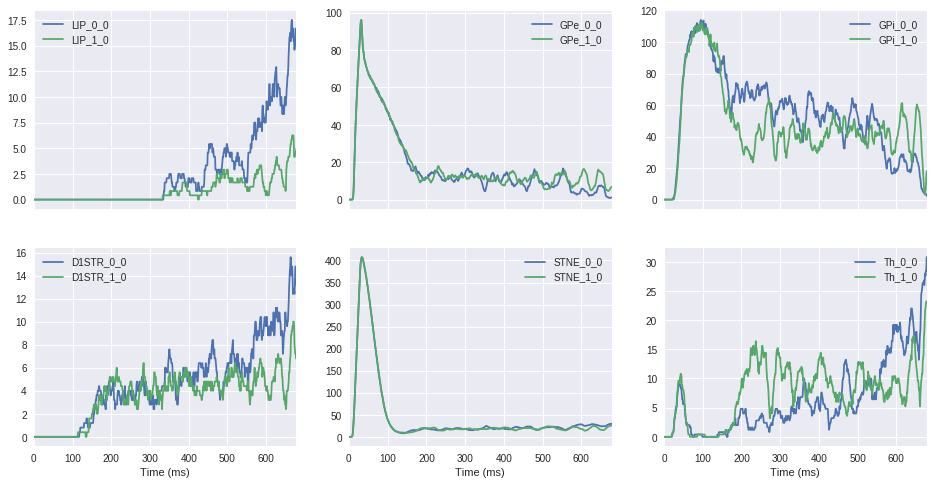

In [401]:
f, (ax1, ax2) = plt.subplots(2, 3, figsize=(16,8), sharex=True)
result = results[0][0]
for i in range(0,result['dims']['choices']):
    result['popfreqs'].plot(x='Time (ms)', y='LIP_'+str(i)+'_0', ax=ax1[0])
    result['popfreqs'].plot(x='Time (ms)', y='GPe_'+str(i)+'_0', ax=ax1[1])
    result['popfreqs'].plot(x='Time (ms)', y='GPi_'+str(i)+'_0', ax=ax1[2])
    result['popfreqs'].plot(x='Time (ms)', y='D1STR_'+str(i)+'_0', ax=ax2[0])
    result['popfreqs'].plot(x='Time (ms)', y='STNE_'+str(i)+'_0', ax=ax2[1])
    result['popfreqs'].plot(x='Time (ms)', y='Th_'+str(i)+'_0', ax=ax2[2])

for ax, axx in zip(ax1, ax2):
    ax.set_xlim(0, ax.get_xlim()[-1])
    axx.set_xlim(0, ax.get_xlim()[-1])

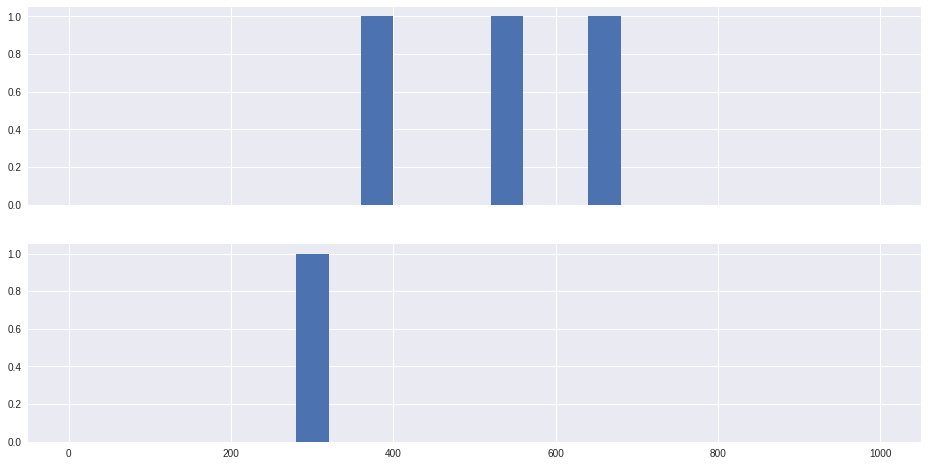

In [402]:
for sn in range(1):
    #print(results[sn][0]['direct'], results[sn][0]['indirect'])
    f, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,8), sharex=True)
    pd.Series(rightreact[sn]).hist(bins=25, range=[0,1000], ax=ax1)
    pd.Series(wrongreact[sn]).hist(bins=25, range=[0,1000], ax=ax2)
    # plt.savefig('/home/mclapp/RTs_direct'+str(results[sn][0]['direct']*100)+'%_indirect'+str(results[sn][0]['indirect']*100)+'%.png')